<a href="https://colab.research.google.com/github/Meshal-Css/Aramco-Challenge/blob/main/CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install torch torchvision

import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [2]:
# تحويلات بسيطة: تحويل لتنسور + تطبيع
tf_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
tf_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_ds = datasets.FashionMNIST(root="./data", train=True,  download=True, transform=tf_train)
test_ds  = datasets.FashionMNIST(root="./data", train=False, download=True, transform=tf_test)

train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=256, shuffle=False)

classes = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 28.6MB/s]


In [3]:
# تحويلات بسيطة: تحويل لتنسور + تطبيع
tf_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
tf_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_ds = datasets.FashionMNIST(root="./data", train=True,  download=True, transform=tf_train)
test_ds  = datasets.FashionMNIST(root="./data", train=False, download=True, transform=tf_test)

train_dl = DataLoader(train_ds, batch_size=128, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=256, shuffle=False)

classes = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [6]:
def accuracy(logits, y):
    return (logits.argmax(1) == y).float().mean().item()

for epoch in range(5):  # خليه صغير للتجربة الأولى
    # تدريب
    model.train()
    tot_loss, tot_acc, tot_n = 0, 0, 0
    for x, y in train_dl:
        x, y = x.to(device), y.to(device)
        opt.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward(); opt.step()
        b = y.size(0)
        tot_loss += loss.item()*b
        tot_acc  += (out.argmax(1)==y).sum().item()
        tot_n    += b
    train_loss, train_acc = tot_loss/tot_n, tot_acc/tot_n

    # اختبار
    model.eval()
    tot_acc, tot_n = 0, 0
    with torch.no_grad():
        for x, y in test_dl:
            x, y = x.to(device), y.to(device)
            out = model(x)
            tot_acc += (out.argmax(1)==y).sum().item()
            tot_n   += y.size(0)
    test_acc = tot_acc/tot_n

    print(f"Epoch {epoch+1}: train_loss={train_loss:.3f}  train_acc={train_acc:.3f}  test_acc={test_acc:.3f}")


Epoch 1: train_loss=0.596  train_acc=0.787  test_acc=0.831
Epoch 2: train_loss=0.443  train_acc=0.837  test_acc=0.852
Epoch 3: train_loss=0.404  train_acc=0.852  test_acc=0.851
Epoch 4: train_loss=0.383  train_acc=0.858  test_acc=0.860
Epoch 5: train_loss=0.365  train_acc=0.865  test_acc=0.861


In [5]:
# Define the model architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

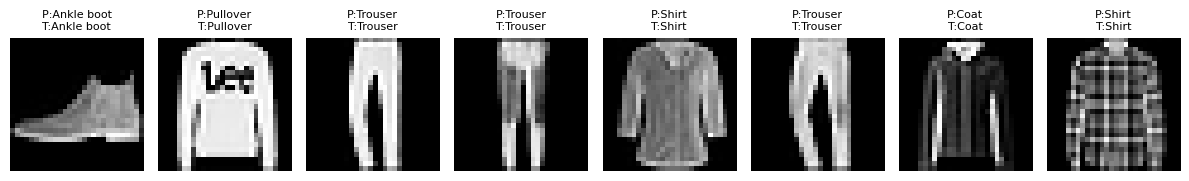

In [8]:
model.eval()
x, y = next(iter(test_dl))
x, y = x.to(device), y.to(device)
with torch.no_grad():
    preds = model(x).argmax(1)

# عرض أول 8 صور
plt.figure(figsize=(12,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x[i].cpu().squeeze(), cmap="gray")
    title = f"P:{classes[preds[i].item()]}\nT:{classes[y[i].item()]}"
    plt.title(title, fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()


ـ CNN (Convolutional Neural Network)
🔹 The Main Idea

A CNN is a type of deep neural network designed to understand images and videos.
Instead of treating an image as just a big array of numbers, CNNs use filters (kernels) to look for patterns such as:

Horizontal / vertical edges

Corners

Shapes (eye, circle, etc.)

As the layers go deeper, the model learns higher-level features (like a face or a car 🚗).

🔹 Key Components of a CNN

Input Layer

Takes the raw image (e.g., 28×28 grayscale or 32×32×3 color).

Convolution Layer

Applies small filters (like 3×3) sliding over the image.

Extracts features (edges, textures).

Produces feature maps.

Activation Function (ReLU)

Adds non-linearity so the network can learn complex things.

Formula: ReLU(x) = max(0, x).

Pooling Layer

Reduces the image size (downsampling).

Common type: Max Pooling (takes the largest value in each region).

Goal: fewer computations, keep important info.

Flatten Layer

Turns the 2D feature maps into a 1D vector.

Fully Connected (Dense) Layer

Combines the extracted features.

Works like the “brain” to decide if the image is, for example, a cat or a dog.

Output Layer

Gives final probabilities using Softmax.

Example: [Cat: 0.95, Dog: 0.04, Car: 0.01].

🔹 How CNN Works (Example with a Cat Image 🐱)

First layers → detect simple edges.

Next layers → detect shapes like eyes, ears.

Final layers → combine everything → decide “This is a cat.”

🔹 CNN vs Traditional Neural Network

MLP (traditional fully connected network): looks at every pixel at once (too heavy).

CNN: looks at small regions → more efficient and accurate for images.

📌 Summary:
CNNs = the “eyes + brain” of a computer, first detecting small patterns and then combining them to understand the full picture.